# K-means Cluster

In [1]:
# Neat trick to print out everything at once, as seen in the next cell
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import matplotlib
matplotlib.__version__
#pillow to view imagess
import PIL
PIL.__version__
import scipy
scipy.__version__

'3.0.2'

'5.4.1'

'1.1.0'

## JPG Images

A JPG image is made up of pixels and each pixel is made up of different values of three component colors (red, green and blue). In this project, we will work with Dataquest's logo in JPG format.

## Reading in an Image

How do you read in the image?
<br>
First, using matplotlib's class image, input image.imread() to transform our logo into a matrix of RGB values.This matrix of RGB values represents every combination of color values of every pixel. Why? The computer reads in the RGB values and then is able to display it. 
<br>
Our shape (200,200,3) represents width, height, and number of color lists (red + green + blue). 200x200 is a small image as we will see below. 
<br/>
It returns an array with each pixels [r,g,b] values


In [3]:
from matplotlib import image as img
img = img.imread('./dataquest.jpg')
img[0,0] #rgb values of 1 pixel
img.shape

array([255, 255, 255], dtype=uint8)

(200, 200, 3)

Building off the last cell, we will reuse our "img" variable that contains the color values of each pixel.

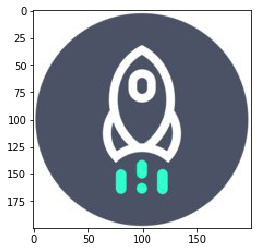

In [4]:
%matplotlib inline 
from matplotlib import pyplot as plt
plt.imshow(img)

Now before moving on to the clustering step. We have another step of processing. We need to create a list for each color that will contain every value of the color that shows up on each pixel. We should have 40,000 colors in each list because (200x200) means the area is 40,000 and each pixel contains red  green and blue values.
<br>
<br>
We will loop through each pixel in our logo which contains our 3 channel rgb values, and then loop through each rgb value within each pixel, identify it as a variable and then add them to their respective list. 
<br>
Why are we doing this?
<br>
We need to know how dominant each color is on their value scale of 0 - 255. After getting 

In [5]:
r = []
g = []
b = []
for line in img:
    for pixel in line:
        rvalue, gvalue, bvalue = pixel
        r.append(rvalue)
        g.append(gvalue)
        b.append(bvalue)
        
r[39995:]
g[9950:9955]
b[0:5]

[255, 255, 255, 255, 255]

[82, 82, 82, 82, 82]

[255, 255, 255, 255, 255]

## Basics of Clustering

Clustering is when you group items based on their similarities. First you determine how many clusters or groups your data should be in. If you determined 3 clusters, then three cluster centers will be plotted. That will be the first iteration. In the next iteration, each cluster center is assigned to their nearest data point. Then the distance is calculated and the center will readjust itself to be in the center of those points. This process is repeated until there are no more changes.

## Number of Clusters

Our next step is to determine how many clusters to group our colors into. By visualizing our data, we can see how many clusters we might need. We can also use this elbow method to determine how many clusters are optimal for the data that we have. In our case, after plotting out our data in a scatter plot, we have two areas where there are many more points suggesting that there are mainly two colors.

Text(0.5, 0, '$X = Red$')

Text(0.5, 0, '$Y = Green$')

Text(0.5, 0, '$Z = Blue$')

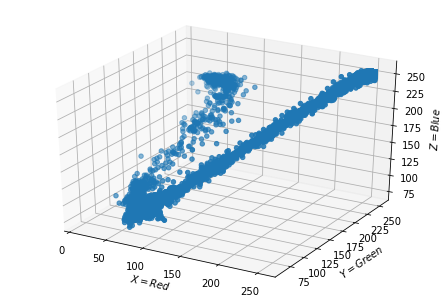

In [36]:
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D as axe
fig = plt.figure() # create figure class
ax = axe(fig) #use Axes3D class to render 3D space
ax.set_xlabel('$X = Red$')
ax.set_ylabel('$Y = Green$')
ax.set_zlabel('$Z = Blue$') # create axis labels
ax.scatter(r,g,b)
plt.show()

## K-means Clustering with SciPy

Let's look at our data easier by visualizing with a pandas dataframe.

In [7]:
import pandas as pd
df = pd.DataFrame({'red': r, 'green': g, 'blue' : b})
df.sample(5)

,red,green,blue
29391,255,253,255
36994,255,255,255
33309,75,77,100
7025,248,249,253
26232,75,82,101


## 3 Steps to Clustering:
<br>
<b>
1. Standarize data<b>
<br>
2. Create cluster centers
<br>
3. Generate cluster labels for each data point (in our case we will only be identifying dominant colors)

### 1. Standardize Data
You want the scale of the data even. 255,255,255 for one pixel will affect our model more than a 60,60,60 pixel. Putting the pixels on an equal scale ensures accurate results. We will use the **whiten( )** method. Mathematically we divide each data point by its standard deviation.

In [8]:
import numpy as np
np.std(r)
np.std(g)
np.std(b) # divide each color value by its respective standard deviation to get scaled value

255 / np.std(r)
255 / np.std(g)
255 / np.std(b) # scaled values match whiten() outputs below

83.11570119050913

80.44125788486512

71.02506887282827

3.0680123772945818

3.1700150731727654

3.5902816293861304

In [39]:
# imported different classes than the guide as his were not working
# import libraries
# vq = vector quantization
# whiten = our standardizer class
from scipy.cluster.vq import vq, kmeans, whiten
df['scaled_r'] = whiten(r)
df['scaled_g'] = whiten(g)
df['scaled_b'] = whiten(b) # pretty straightforward code, whiten standarizes the values
df.sample(3) #to see a variety of values

,red,green,blue,scaled_r,scaled_g,scaled_b
21589,75,82,101,0.902357,1.019377,1.422033
36282,75,82,101,0.902357,1.019377,1.422033
1406,255,255,255,3.068012,3.170015,3.590282


### 2. Create Cluster Centers


In [40]:
from scipy.cluster.vq import vq, kmeans, whiten
cluster_centers, distortion = kmeans(df[['scaled_r','scaled_g', 'scaled_b']], 2) # parameters our data and number of clusters

In [41]:
cluster_centers
distortion # the author did not go indepth with distortion. My understanding is that the lower the distortion is, the better the clustering was.

array([[2.95034157, 3.12485455, 3.52682837],
       [0.91847689, 1.05304293, 1.44798252]])

0.15383630600519907

In our array, we have two sets that represent our cluster centers. Each center represents the color data points that were closest to them. We are almost there!

In [44]:
print(cluster_centers) # our cluster centers

[[2.95034157 3.12485455 3.52682837]
 [0.91847689 1.05304293 1.44798252]]


### 3. Display Dominant Colors / Essentially Our Cluster Labels

We will need to take our centroid_center values and multiply them by their standard deviation to essentially reverse standardize them so that they mean something to us.

In [35]:
# standard deviations of each color
df[['red','green','blue']].std()
std_r, std_g, std_b = df[['red','green','blue']].std()

red      83.116740
green    80.442263
blue     71.025957
dtype: float64

After getting our color values, we need to render it in a format where we can display the image using imshow( ). 
The output will be divided by 255 so that the imshow( ) method can read the values. If you plot the values then you will get 6 different colors. By putting the colors list into its own list, the centroid_centers are separated finally outputting two colors. I have displayed both colors and \[colors] below.

In [31]:
colors = []
for center in cluster_centers:
    center
    scaled_r, scaled_g, scaled_b = center
    colors.append((
    scaled_r * std_r / 255,
    scaled_g * std_g / 255,
    scaled_b * std_b / 255)) #careful to make sure the append stays within the loop

array([2.95034157, 3.12485455, 3.52682837])

array([0.91847689, 1.05304293, 1.44798252])

In [32]:
colors
[colors] #imshow reads in dimension of 1 

[(0.9616579369448718, 0.9857661668500941, 0.9823386632645),
 (0.2993757046640935, 0.33219277064111163, 0.40331115259768613)]

[[(0.9616579369448718, 0.9857661668500941, 0.9823386632645),
  (0.2993757046640935, 0.33219277064111163, 0.40331115259768613)]]

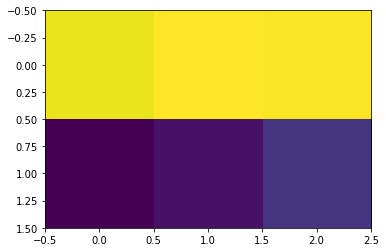

In [33]:
plt.imshow(colors)

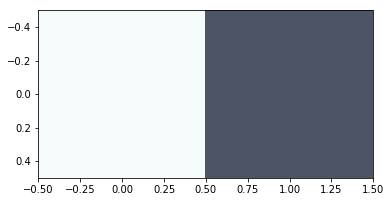

In [45]:
plt.imshow([colors])

## Conclusion